In [1681]:
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import matplotlib.pyplot as plt


In [1682]:
df=pd.read_csv('DATA.csv', encoding='ISO-8859-1')

In [1683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EquableID                         5684 non-null   int64  
 1   System_Name                       5684 non-null   object 
 2   Plan_FullName                     5684 non-null   object 
 3   Plan_InternalName                 5684 non-null   object 
 4   Plan_Shorthand                    5684 non-null   object 
 5   Investment_Fund                   5683 non-null   object 
 6   SSA                               5661 non-null   object 
 7   SSANotes                          597 non-null    object 
 8   Job_Covers                        5684 non-null   object 
 9   StateAbbrev                       5684 non-null   object 
 10  StateName                         5684 non-null   object 
 11  GovtName                          5684 non-null   object 
 12  ActRpt

In [1684]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

EquableID                              0
System_Name                            0
Plan_FullName                          0
Plan_InternalName                      0
Plan_Shorthand                         0
Investment_Fund                        1
SSA                                   23
SSANotes                            5087
Job_Covers                             0
StateAbbrev                            0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                 22
Year                                   0
ValReport                            184
ACFR                                 185
DocumentNotes                       4808
MiscellaneousNotes                  5079
Mem_NC                               822
Mem_UAAL                             819
Mem_Tot                              819
Emp_NC                               831
Emp_UAAL        

In [1685]:
df=df.drop(columns=['SSANotes','StateAbbrev','DocumentNotes','MiscellaneousNotes','ReturnAsOf','Source','ReturnClassification','RollForward','Plan_InternalName','Plan_FullName','System_Name','EquableID' ])

In [1686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Plan_Shorthand                    5684 non-null   object 
 1   Investment_Fund                   5683 non-null   object 
 2   SSA                               5661 non-null   object 
 3   Job_Covers                        5684 non-null   object 
 4   StateName                         5684 non-null   object 
 5   GovtName                          5684 non-null   object 
 6   ActRptDate                        5684 non-null   object 
 7   DateFYE                           5684 non-null   object 
 8   Month                             5662 non-null   float64
 9   Year                              5684 non-null   int64  
 10  ValReport                         5500 non-null   float64
 11  ACFR                              5499 non-null   float64
 12  Mem_NC

In [1687]:

df.isnull().sum()

Plan_Shorthand                         0
Investment_Fund                        1
SSA                                   23
Job_Covers                             0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                 22
Year                                   0
ValReport                            184
ACFR                                 185
Mem_NC                               822
Mem_UAAL                             819
Mem_Tot                              819
Emp_NC                               831
Emp_UAAL                             831
Emp_Tot                              818
NC_Tot                               826
UAAL_Tot                             828
AVA                                  534
AAL                                  536
UAAL                                 534
FundedRatio_Actuarial                529
MVA             

In [1688]:
df['Investment_Fund'].value_counts()
# sb.countplot(df['Investment_Fund'])
df['Investment_Fund'].replace(np.nan, 'Utah Retirement System', inplace=True)
df['Investment_Fund'].isnull().sum()


0

In [1689]:

# sb.countplot(df['SSA'])
df['SSA'].replace(np.nan, 'Yes', inplace=True)
df['SSA'].isnull().sum()


0

In [1690]:
# df['Month'].value_counts()
# sb.displot(df['Month'])
df['Month'].replace(np.nan, df['Month'].mode()[0], inplace=True)
df['Month'].isnull().sum()

0

0

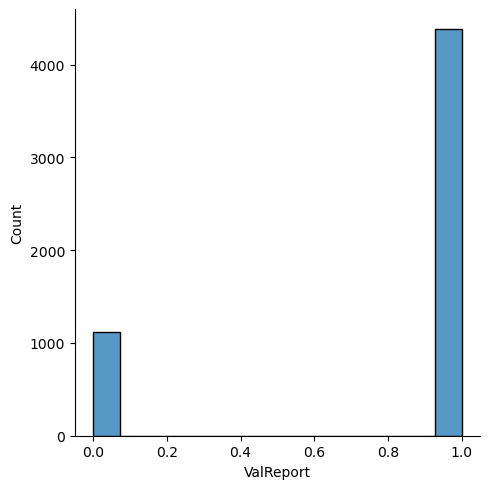

In [1691]:
sns.displot(df['ValReport'])
df['ValReport'].isnull().sum()
df['ValReport'].replace(np.nan, df['ValReport'].mode()[0], inplace=True)
df['ValReport'].isnull().sum()

0

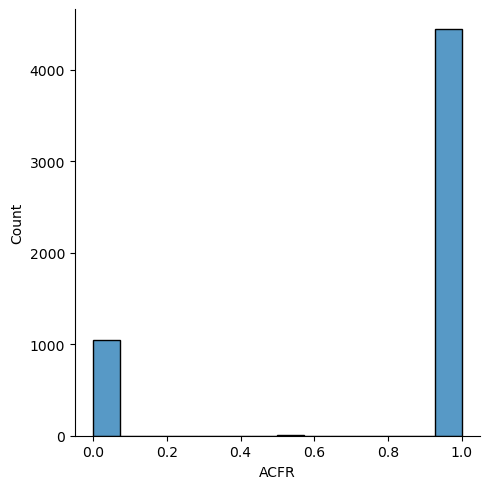

In [1692]:
sns.displot(df['ACFR'])
df['ACFR'].isnull().sum()
df['ACFR'].replace(np.nan, df['ACFR'].mode()[0], inplace=True)
df['ACFR'].isnull().sum()

In [1693]:
df.shape

(5684, 78)

In [1694]:
df.isnull().sum()

Plan_Shorthand                         0
Investment_Fund                        0
SSA                                    0
Job_Covers                             0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                  0
Year                                   0
ValReport                              0
ACFR                                   0
Mem_NC                               822
Mem_UAAL                             819
Mem_Tot                              819
Emp_NC                               831
Emp_UAAL                             831
Emp_Tot                              818
NC_Tot                               826
UAAL_Tot                             828
AVA                                  534
AAL                                  536
UAAL                                 534
FundedRatio_Actuarial                529
MVA             

START OF CLEANING

Mem_NC

In [1695]:
# df1=df[['Plan_Shorthand','Investment_Fund','SSA','Job_Covers','StateName','GovtName','ActRptDate','DateFYE','Month','Year','ValReport','ACFR','Mem_NC']]
df['Mem_NC'] = pd.to_numeric(df['Mem_NC'], errors='coerce')
df['Mem_NC'].isnull().sum()

1112

In [1696]:
df['Mem_NC'] = df['Mem_NC'].replace(['DNE', 'N/R'], np.nan)
df['Mem_NC'].isnull().sum()

1112

In [1697]:
df['Mem_NC'] = df['Mem_NC'].interpolate()
df['Mem_NC'].isnull().sum()

1

In [1698]:
df['Mem_NC'] = df['Mem_NC'].fillna(0.05)
df['Mem_NC'].isnull().sum()

0

Mem_UAAL

In [1699]:
df['Mem_UAAL']= pd.to_numeric(df['Mem_UAAL'], errors='coerce')

In [1700]:
df['Mem_UAAL'] = df['Mem_UAAL'].replace(['DNE', 'N/R'], np.nan)
df['Mem_UAAL'].isnull().sum()

1109

In [1701]:
df['Mem_UAAL'] = df['Mem_UAAL'].interpolate()
df['Mem_UAAL'] = df['Mem_UAAL'].fillna(method='bfill')
df['Mem_UAAL'].isnull().sum()


0

Mem_Tot

In [1702]:
df['Mem_Tot'] = pd.to_numeric(df['Mem_Tot'], errors='coerce')

In [1703]:
df['Mem_Tot'] = df['Mem_Tot'].replace(['DNE', 'N/R'], np.nan)
df['Mem_Tot'].isnull().sum()

1109

In [1704]:
df['Mem_Tot']  = df['Mem_Tot'].interpolate()
df['Mem_Tot'] = df['Mem_Tot'].fillna(method='bfill')
df['Mem_Tot'].isnull().sum()

0

In [1705]:
(df['Mem_NC']==df['Mem_Tot']).value_counts()

True     5515
False     169
Name: count, dtype: int64

In [1706]:
df.isnull().sum()
(df['ActRptDate']==df['DateFYE']).value_counts()

True     3449
False    2235
Name: count, dtype: int64

Emp_NC

In [1707]:
df['Emp_NC'] = df['Emp_NC'].replace(['DNE', 'N/R'], np.nan)
df['Emp_NC']= pd.to_numeric(df['Emp_NC'], errors='coerce')



In [1708]:
df['Emp_NC'] = df['Emp_NC'].interpolate()
df['Emp_NC'] = df['Emp_NC'].fillna(method='bfill')
df['Emp_NC'].isnull().sum()


0

Emp_UAAL

In [1709]:
df['Emp_UAAL'] = df['Emp_UAAL'].replace(['DNE', 'N/R'], np.nan)
df['Emp_UAAL'] = pd.to_numeric(df['Emp_UAAL'], errors='coerce')


In [1710]:
df['Emp_UAAL'] = df['Emp_UAAL'].interpolate()
df['Emp_UAAL'] = df['Emp_UAAL'].fillna(method='bfill')
df['Emp_UAAL'].isnull().sum()


0

Emp_Tot

In [1711]:
df['Emp_Tot'] = df['Emp_Tot'].replace(['DNE', 'N/R'], np.nan)
df['Emp_Tot']= pd.to_numeric(df['Emp_Tot'], errors='coerce')


In [1712]:
df['Emp_Tot'] = df['Emp_Tot'].interpolate()
df['Emp_Tot'] = df['Emp_Tot'].fillna(method='bfill')
df['Emp_Tot'].isnull().sum()

0

NC_Tot

In [1713]:
df['NC_Tot'] = df['NC_Tot'].replace(['DNE', 'N/R'], np.nan)
df['NC_Tot']= pd.to_numeric(df['NC_Tot'], errors='coerce')
df['NC_Tot'] = df['NC_Tot'].interpolate()
df['NC_Tot'] = df['NC_Tot'].fillna(method='bfill')
df['NC_Tot'].isnull().sum()

0

UAAL_Tot 

In [1714]:
df['UAAL_Tot']=df['UAAL_Tot'].str.replace('$','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace('(','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace(')','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace(' ','')
df['UAAL_Tot']


0        NaN
1          -
2          -
3       0.06
4       0.01
5       0.01
6       0.02
7       0.03
8       0.05
9       0.06
10      0.07
11      0.07
12      0.07
13      0.08
14      0.11
15      0.12
16      0.12
17      0.13
18      0.12
19      0.13
20      0.13
21      0.13
22      0.14
23      0.14
24       NaN
25       NaN
26         -
27         -
28      0.01
29      0.01
30      0.01
31      0.03
32      0.03
33      0.05
34      0.05
35      0.06
36      0.06
37      0.06
38      0.07
39      0.09
40      0.10
41      0.10
42      0.10
43      0.09
44      0.10
45      0.10
46      0.10
47      0.10
48      0.10
49       NaN
50       NaN
51      0.02
52      0.02
53      0.01
54      0.01
55      0.12
56      0.12
57      0.15
58      0.18
59      0.07
60      0.07
61      0.07
62      0.12
63      0.13
64      0.14
65      0.21
66      0.22
67      0.14
68      0.12
69      0.15
70      0.18
71      0.18
72      0.19
73      0.17
74       NaN
75       NaN
76      0.02

In [1715]:
df['UAAL_Tot'] = df['UAAL_Tot'].replace(['DNE', 'N/R','-'], np.nan)
df['UAAL_Tot']

0        NaN
1        NaN
2        NaN
3       0.06
4       0.01
5       0.01
6       0.02
7       0.03
8       0.05
9       0.06
10      0.07
11      0.07
12      0.07
13      0.08
14      0.11
15      0.12
16      0.12
17      0.13
18      0.12
19      0.13
20      0.13
21      0.13
22      0.14
23      0.14
24       NaN
25       NaN
26       NaN
27       NaN
28      0.01
29      0.01
30      0.01
31      0.03
32      0.03
33      0.05
34      0.05
35      0.06
36      0.06
37      0.06
38      0.07
39      0.09
40      0.10
41      0.10
42      0.10
43      0.09
44      0.10
45      0.10
46      0.10
47      0.10
48      0.10
49       NaN
50       NaN
51      0.02
52      0.02
53      0.01
54      0.01
55      0.12
56      0.12
57      0.15
58      0.18
59      0.07
60      0.07
61      0.07
62      0.12
63      0.13
64      0.14
65      0.21
66      0.22
67      0.14
68      0.12
69      0.15
70      0.18
71      0.18
72      0.19
73      0.17
74       NaN
75       NaN
76      0.02

In [1716]:
df['UAAL_Tot']= pd.to_numeric(df['UAAL_Tot'], errors='coerce')
df['UAAL_Tot'] = df['UAAL_Tot'].interpolate()
df['UAAL_Tot'] = df['UAAL_Tot'].fillna(method='bfill')
df['UAAL_Tot'].isnull().sum()

0

InflationAssumption_GASB

/var/folders/x0/6jht0gnd02g233txyq1tdcrr0000gn/T/ipykernel_26571/1361878941.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['InflationAssumption_GASB'])


<Axes: xlabel='InflationAssumption_GASB', ylabel='Density'>

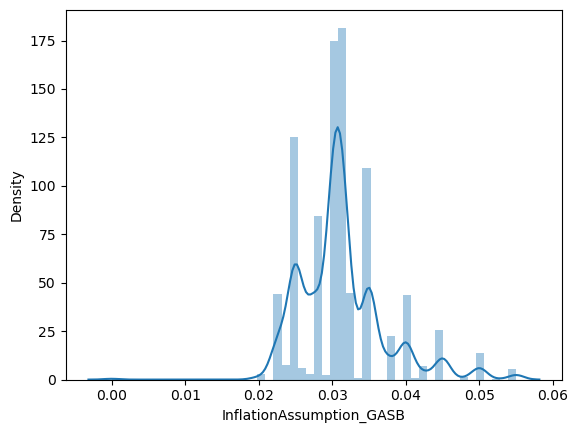

In [1717]:
df['InflationAssumption_GASB']=df['InflationAssumption_GASB'].replace(['DNE','N/R'],np.nan)
df['InflationAssumption_GASB']= pd.to_numeric(df['InflationAssumption_GASB'], errors='coerce')
df['InflationAssumption_GASB'] = df['InflationAssumption_GASB'].replace(np.nan,df['InflationAssumption_GASB'].mean())
sns.distplot(df['InflationAssumption_GASB'])

In [1718]:
df.isnull().sum()

Plan_Shorthand                         0
Investment_Fund                        0
SSA                                    0
Job_Covers                             0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                  0
Year                                   0
ValReport                              0
ACFR                                   0
Mem_NC                                 0
Mem_UAAL                               0
Mem_Tot                                0
Emp_NC                                 0
Emp_UAAL                               0
Emp_Tot                                0
NC_Tot                                 0
UAAL_Tot                               0
AVA                                  534
AAL                                  536
UAAL                                 534
FundedRatio_Actuarial                529
MVA             

In [1719]:
df['GDP'].value_counts()
df['GDP']=df['GDP'].str.replace('$','')
df['GDP']=df['GDP'].str.replace(',','')
df['GDP']=df['GDP'].str.replace(' ','')

/var/folders/x0/6jht0gnd02g233txyq1tdcrr0000gn/T/ipykernel_26571/594340836.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GDP'])


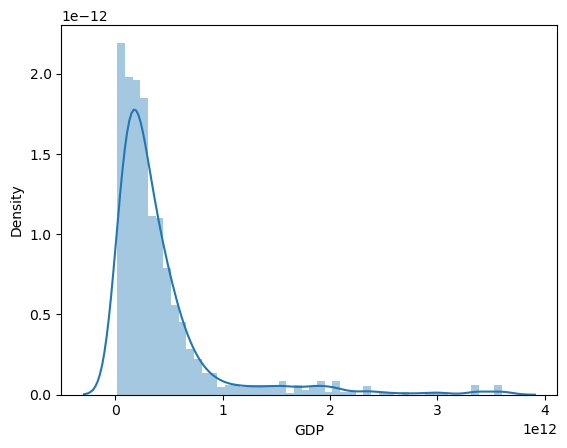

In [1720]:
df['GDP']=df['GDP'].replace(["DNE","N/R"],np.nan)
df['GDP']= pd.to_numeric(df['GDP'], errors='coerce')
sns.distplot(df['GDP'])
df['GDP'].replace(np.nan,df['GDP'].median(),inplace=True)

In [1721]:
df1=df[         
['SSA','Mem_NC',     
'Mem_UAAL',    
'Mem_Tot',    
'Emp_NC',    
'Emp_UAAL',    
'Emp_Tot',    
'NC_Tot',    
'UAAL_Tot',
'InflationAssumption_GASB',
'GDP',
'TotalBenefits',
'BeneficiariesTotal',
]]


In [1722]:
df1['TotalBenefits'] = df1['TotalBenefits'].replace(['DNE', 'N/R','-'], np.nan)
df1=df1.dropna()
df1['TotalBenefits']= pd.to_numeric(df['TotalBenefits'], errors='coerce')


/var/folders/x0/6jht0gnd02g233txyq1tdcrr0000gn/T/ipykernel_26571/867649964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalBenefits'] = df1['TotalBenefits'].replace(['DNE', 'N/R','-'], np.nan)


In [1723]:
df1['BeneficiariesTotal'] = df1['BeneficiariesTotal'].replace(['DNE', 'N/R','-'], np.nan)
df1=df1.dropna()
df1['BeneficiariesTotal']= pd.to_numeric(df['BeneficiariesTotal'], errors='coerce')


In [1725]:
df1['SSA'] = df1['SSA'].replace(['Yes'], 1)
df1['SSA'] = df1['SSA'].replace(['No'], 0)
df1['SSA'] = df1['SSA'].replace(['Mixed'], 2)
df1['SSA'].value_counts()


SSA
1    2747
0    1501
2     660
Name: count, dtype: int64

In [1726]:
df1['BenefitsPerPerson'] = df1['TotalBenefits'] / df1['BeneficiariesTotal']
df1.head()

,SSA,Mem_NC,Mem_UAAL,Mem_Tot,Emp_NC,Emp_UAAL,Emp_Tot,NC_Tot,UAAL_Tot,InflationAssumption_GASB,GDP,TotalBenefits,BeneficiariesTotal,BenefitsPerPerson
1,1,0.05,0.0,0.05,0.0408,0.0000,0.0408,0.0908,0.06,0.045,1.229155e+11,396621000.0,27064.0,14654.929057
2,1,0.05,0.0,0.05,0.0395,0.0000,0.0395,0.0895,0.06,0.045,1.275050e+11,414821000.0,28415.0,14598.662678
3,1,0.05,0.0,0.05,0.0507,-0.0554,-0.0047,0.1007,0.06,0.045,1.341526e+11,448083000.0,29874.0,14999.096204
4,1,0.05,0.0,0.05,0.0491,-0.0105,0.0386,0.0991,0.01,0.045,1.477152e+11,480064000.0,31438.0,15270.182582
5,1,0.05,0.0,0.05,0.0449,0.0075,0.0524,0.0949,0.01,0.045,1.588468e+11,518308000.0,33266.0,15580.713040


In [1727]:
df1.dtypes

SSA                           int64
Mem_NC                      float64
Mem_UAAL                    float64
Mem_Tot                     float64
Emp_NC                      float64
Emp_UAAL                    float64
Emp_Tot                     float64
NC_Tot                      float64
UAAL_Tot                    float64
InflationAssumption_GASB    float64
GDP                         float64
TotalBenefits               float64
BeneficiariesTotal          float64
BenefitsPerPerson           float64
dtype: object

<Axes: >

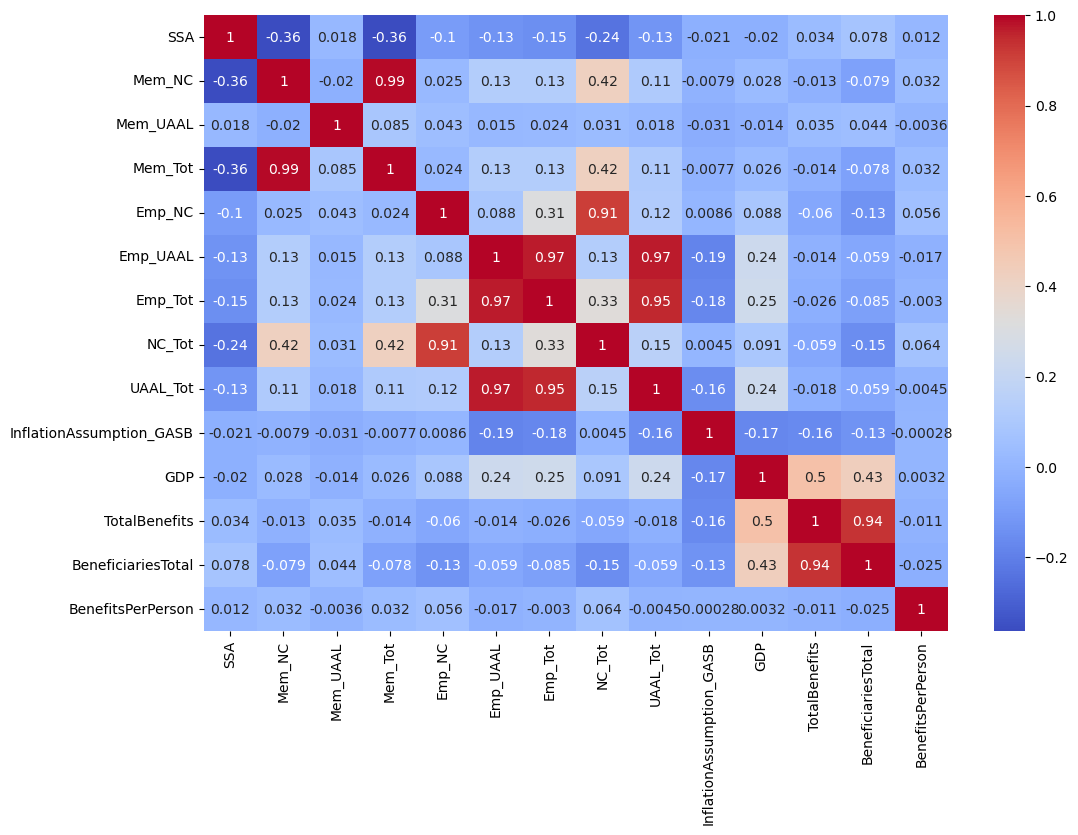

In [1728]:
cor=df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap='coolwarm')

In [1729]:
df.isnull().sum()

Plan_Shorthand                         0
Investment_Fund                        0
SSA                                    0
Job_Covers                             0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                  0
Year                                   0
ValReport                              0
ACFR                                   0
Mem_NC                                 0
Mem_UAAL                               0
Mem_Tot                                0
Emp_NC                                 0
Emp_UAAL                               0
Emp_Tot                                0
NC_Tot                                 0
UAAL_Tot                               0
AVA                                  534
AAL                                  536
UAAL                                 534
FundedRatio_Actuarial                529
MVA             

In [1740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Plan_Shorthand                    5684 non-null   object 
 1   Investment_Fund                   5684 non-null   object 
 2   SSA                               5684 non-null   object 
 3   Job_Covers                        5684 non-null   object 
 4   StateName                         5684 non-null   object 
 5   GovtName                          5684 non-null   object 
 6   ActRptDate                        5684 non-null   object 
 7   DateFYE                           5684 non-null   object 
 8   Month                             5684 non-null   float64
 9   Year                              5684 non-null   int64  
 10  ValReport                         5684 non-null   float64
 11  ACFR                              5684 non-null   float64
 12  Mem_NC

END OF CLEANING 


In [1730]:
# object_features=df1.select_dtypes(include='object').columns.tolist()
# print(object_features,len(object_features))

In [1731]:
# df2=pd.get_dummies(df1,columns=object_features, prefix=object_features,drop_first=False, )

In [1732]:
# import matplotlib.pyplot as plt

# # Assuming you have a correlation_matrix computed as described earlier
# correlation_matrix = df2.corr()

# plt.figure(figsize=(10, 8), dpi=300)  # Adjust the figure size as needed
# plt.matshow(correlation_matrix, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.colorbar()  # Add a colorbar for reference
# plt.show()

In [1733]:
# m=df2.columns

In [1734]:
# df2.info()

In [1735]:
# x = df2.drop('Mem_NC',axis =1)
# y = df2['Mem_NC']

In [1736]:
# from sklearn.model_selection import train_test_split

In [1737]:
# train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=56)

In [1738]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression
# linear_reg = LinearRegression()

In [1739]:
# linear_reg.fit(train_x, train_y)
# train_predict = linear_reg.predict(train_x)
# test_predict = linear_reg.predict(test_x)
# mse_test = mean_squared_error(test_y, test_predict)
# mae_test = mean_absolute_error(test_y, test_predict)
# r2_test = r2_score(test_y, test_predict)

# print('Mean Squared Error (MSE):', mse_test)
# print('Mean Absolute Error (MAE):', mae_test)
# print('R-squared (R^2) Score:', r2_test)